In [8]:
!pip install python-dotenv

In [11]:

from dotenv import load_dotenv
import os

# Load the environment variables from the .env file
load_dotenv()

# Now you can access them
my_env_variable = os.environ.get("QDRANT_URL")
 

print(my_env_variable)


localhost:6333


In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
from src.embeddings import EmbeddingModelSingleton, CrossEncoderModelSingleton
from src.qdrant import build_qdrant_client
from src.retrievers import QdrantVectorDBRetriever, RetrievalVisualizer

In [12]:
embedding_model = EmbeddingModelSingleton()
cross_endocer_model = CrossEncoderModelSingleton()
qdrant_client = build_qdrant_client()

vector_db_retriever = QdrantVectorDBRetriever(
    embedding_model=embedding_model,
    vector_db_client=qdrant_client,
    cross_encoder_model=cross_endocer_model,
)

In [13]:
all_posts = vector_db_retriever.scroll()
visualizer = RetrievalVisualizer(posts=all_posts)

/Users/manishbabel/anaconda3/envs/nobita/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 320/320 [01:54<00:00,  2.80it/s]


In [14]:
query_question = "Posts about Qdrant"
retrieved_results = vector_db_retriever.search(query=query_question, limit=3, return_all=True)
for post in retrieved_results["posts"]:
    vector_db_retriever.render_as_html(post)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.54it/s]


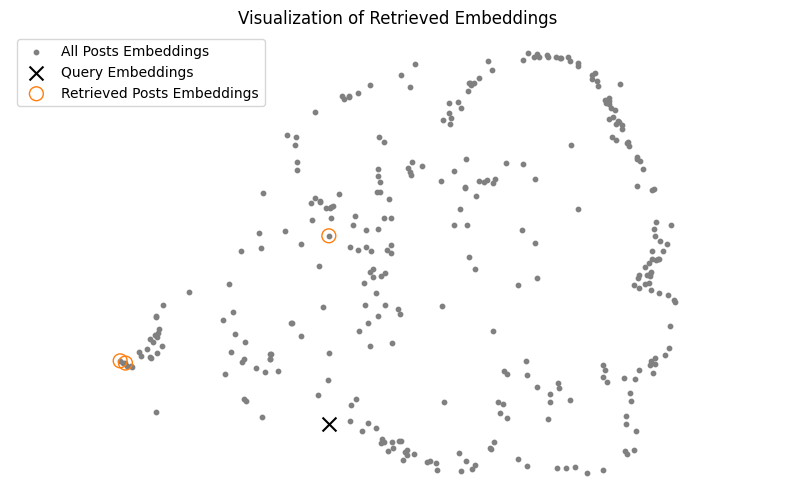

In [15]:
visualizer.render(
    embedded_queries=retrieved_results["embdedded_queries"],
    retrieved_posts=retrieved_results["posts"],
)

In [16]:
query_post = """𝗪𝗵𝗮𝘁 do you need to 𝗳𝗶𝗻𝗲-𝘁𝘂𝗻𝗲 an open-source 𝗟𝗟𝗠 to create your own 𝗳𝗶𝗻𝗮𝗻𝗰𝗶𝗮𝗹 𝗮𝗱𝘃𝗶𝘀𝗼𝗿?\nThis is the 𝗟𝗟𝗠 𝗳𝗶𝗻𝗲-𝘁𝘂𝗻𝗶𝗻𝗴 𝗸𝗶𝘁 you must know ↓
\n𝗗𝗮𝘁𝗮𝘀𝗲𝘁\nThe key component of any successful ML project is the data.\nYou need a 100 - 1000 sample Q&A (questions & answers) dataset with financial scenarios.
\nThe best approach is to hire a bunch of experts to create it manually.\nBut, for a PoC, that might get expensive & slow.\nThe good news is that a method called 
\"𝘍𝘪𝘯𝘦𝘵𝘶𝘯𝘪𝘯𝘨 𝘸𝘪𝘵𝘩 𝘥𝘪𝘴𝘵𝘪𝘭𝘭𝘢𝘵𝘪𝘰𝘯\" exists.\nIn a nutshell, this is how it works: \"Use a big & powerful LLM (e.g., GPT4) to generate your fine-tuning data. 
After, use this data to fine-tune a smaller model (e.g., Falcon 7B).\"\nFor specializing smaller LLMs on specific use cases (e.g., financial advisors), 
this is an excellent method to kick off your project.\n𝗣𝗿𝗲-𝘁𝗿𝗮𝗶𝗻𝗲𝗱 𝗼𝗽𝗲𝗻-𝘀𝗼𝘂𝗿𝗰𝗲 𝗟𝗟𝗠\nYou never want to start training your LLM from scratch (or rarely).\n
Why? Because you need trillions of tokens & millions of $$$ in compute power.\nYou want to fine-tune your LLM on your specific task.\n
he good news is that you can find a plethora of open-source LLMs on HuggingFace (e.g., Falcon, LLaMa, etc.)\n
𝗣𝗮𝗿𝗮𝗺𝗲𝘁𝗲𝗿 𝗲𝗳𝗳𝗶𝗰𝗶𝗲𝗻𝘁 𝗳𝗶𝗻𝗲-𝘁𝘂𝗻𝗶𝗻𝗴\nAs LLMs are big... duh...\n... they don't fit on a single GPU.\n
As you want only to fine-tune the LLM, the community invented clever techniques that quantize the LLM (to fit on a single GPU) and 
fine-tune only a set of smaller adapters.\nOne popular approach is QLoRA, which can be implemented using HF's `𝘱𝘦𝘧𝘵` Python package.\n𝗠𝗟𝗢𝗽𝘀\n
As you want your project to get to production, you have to integrate the following MLOps components:\n
- experiment tracker to monitor & compare your experiments\n
- model registry to version & share your models between the FTI pipelines\n-
prompts monitoring to debug & track complex chains\n
↳ All of them are available on ML platforms, such as Comet ML 🔗\nhttps://lnkd.in/d7jNQz7m\n𝗖𝗼𝗺𝗽𝘂𝘁𝗲 𝗽𝗹𝗮𝘁𝗳𝗼𝗿𝗺\n
The most common approach is to train your LLM on your on-prem Nivida GPUs cluster or rent them on cloud providers such as AWS, Paperspace, etc.\n
But what if I told you that there is an easier way?\nThere is! It is called serverless.\nFor example,\nBeam\nis a GPU serverless provider that 
makes deploying your training pipeline as easy as decorating your Python function with `@𝘢𝘱𝘱.𝘳𝘶𝘯()`.\n
Along with ease of deployment, you can easily add your training code to your CI/CD to add the final piece of the MLOps puzzle, 
called CT (continuous training).\n↳ Beam: 🔗\nhttps://lnkd.in/dedCaMDh\n.\n
↳ To see all these components in action, check out my FREE 𝗛𝗮𝗻𝗱𝘀-𝗼𝗻 𝗟𝗟𝗠𝘀 𝗰𝗼𝘂𝗿𝘀𝗲 & give it a ⭐:  
🔗\nhttps://lnkd.in/dZgqtf8f\nhashtag\n#\nmachinelearning\nhashtag\n#\nmlops\nhashtag\n#\ndatascience"""

retrieved_results = vector_db_retriever.search(query=query_post, limit=5, return_all=True)
for post in retrieved_results["posts"]:
    vector_db_retriever.render_as_html(post)

In [17]:
from src.models import CleanedPost

CleanedPost.clean(query_post)

'What do you need to fine-tune an open-source LLM to create your own financial advisor?\nThis is the LLM fine-tuning kit you must know  \n\nDataset\nThe key component of any successful ML project is the data.\nYou need a 100 - 1000 sample Q&A (questions & answers) dataset with financial scenarios.\n\nThe best approach is to hire a bunch of experts to create it manually.\nBut, for a PoC, that might get expensive & slow.\nThe good news is that a method called \n"Finetuning with distillation" exists.\nIn a nutshell, this is how it works: "Use a big & powerful LLM (e.g., GPT4) to generate your fine-tuning data. \nAfter, use this data to fine-tune a smaller model (e.g., Falcon 7B)."\nFor specializing smaller LLMs on specific use cases (e.g., financial advisors), \nthis is an excellent method to kick off your project.\nPre-trained open-source LLM\nYou never want to start training your LLM from scratch (or rarely).\n\nWhy? Because you need trillions of tokens & millions of $$$ in compute powe

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.07it/s]


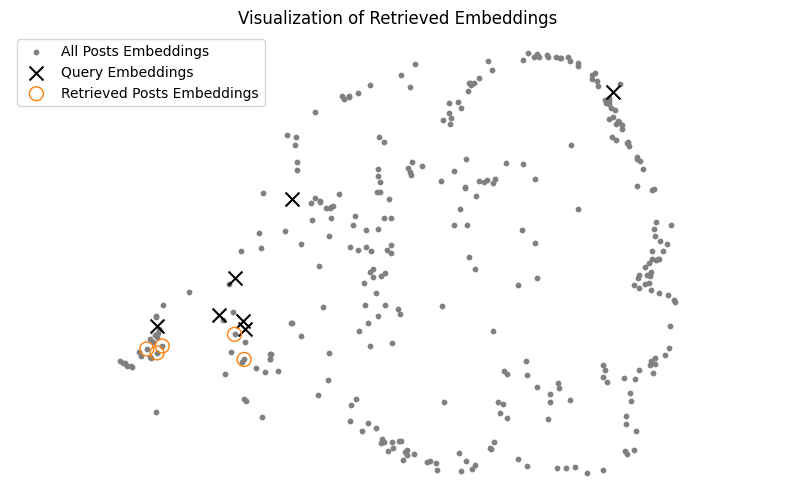

In [18]:
visualizer.render(
    embedded_queries=retrieved_results["embdedded_queries"],
    retrieved_posts=retrieved_results["posts"],
)